# Exploratory and Regression Analysis and Visualization of the Open Exoplanet Catalogue
In this notebook I explore the Open Exoplanet Catalogue dataset using numpy, pandas, matplotlib, seaborn and other
python libraries. A description of this dataset can be found at
https://www.kaggle.com/mrisdal/open-exoplanet-catalogue and https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue. This is a database of all discovered extra-solar planets in csv format. The filename of the dataset is 'oec.csv'. It includes the characteristics of all discovered exoplanets (as well as planets in our own solar system). Data fields (columns) include planet and host star attributes, discovery methods, and date of discovery, such as:
* **PeriodDays**: The orbital period (how long it takes the planet to orbit its host star once), measured in days, of the planet around the host star or binary (double) star system.
* **PlanetaryMassJpt**: The mass of the planet in Jupiter masses, where 1 Jupiter mass is 1.8991766e+27 kg.
* **RadiusJpt**: The physical radius of the planet in Jupiter radii where 1 Jupiter radius is 69911000 m.
* **SurfaceTempK**: The surface temperature of the planet (units: Kelvins).
* **SemiMajorAxisAU**: The semi-major axis of a planet (essentially the average distance between the planet and the host star, but a more precise and detailed description here: https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes) in Astronomical Units (AU), which is roughly the average distance between the Earth and Sun (149597870700 meters, or about 150 million kilometers (https://en.wikipedia.org/wiki/Astronomical_unit). 
* **Eccentricity**: The orbital eccentricity of the planet around its host star. The orbital eccentricity of an astronomical object is a parameter that determines the amount by which its orbit around another body deviates from a perfect circle. A value of 0 is a circular orbit, values between 0 and 1 form an elliptical orbit, 1 is a parabolic escape orbit, and greater than 1 is a hyperbola (https://en.wikipedia.org/wiki/Orbital_eccentricity).
* **HostStarMassSlrMass**: The mass of the host star in solar masses, where 1 solar mass is 1.9891e+30 kg
* **HostStarRadiusSlrRad**: The physical radius of the host star in solar radii, where 1 solar radius is 6.96e+08 m.
* **HostStarMetallicity**: The stellar metallicity of the host star, which is fraction of mass of the host star that is not in hydrogen or helium (see https://en.wikipedia.org/wiki/Metallicity).
* **HostStarTempK**: The equilibrium temperature of the host star in Kelvins.
* **HostStarAgeGyr**: The age of the host star in giga-years.
* **DistFromSunParsec**: The distance of the planet from the sun in units of parsecs, where a parsec is equal to about 3.26 light-years (31 trillion kilometers or 19 trillion miles) in length (see https://en.wikipedia.org/wiki/Parsec).

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (10, 6)}) 
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot') # setting the plot style
%matplotlib inline 
from __future__ import print_function, unicode_literals, division

# ignore various warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We use the read_csv function in pandas to load and read the dataset 
# The read_csv function points to where the file is.
planetData = pd.read_csv("/Users/markyashar/sf16_ids1_project/oec.csv")
planetData.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
0,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
1,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
2,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.46,0.45,0.00,3584.0,NaN
3,Kepler-9 b,0,0.2500,0.840,19.224180,0.1430,0.0626,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN
4,Kepler-9 c,0,0.1700,0.820,39.031060,0.2290,0.0684,NaN,NaN,NaN,...,2010.0,15/12/03,19 02 17,+38 24 03,650.0,1.07,1.02,0.12,5777.0,NaN


We examine some properties and characteristics of the dataset and its format here:

In [3]:
print("Number of observations (rows):",planetData.shape[0] )
print("Number of features (columns):",planetData.shape[1] )
print(planetData.shape)
print(planetData.info())

Number of observations (rows): 3426
Number of features (columns): 24
(3426, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 24 columns):
PlanetIdentifier        3426 non-null object
TypeFlag                3426 non-null int64
PlanetaryMassJpt        1176 non-null float64
RadiusJpt               2670 non-null float64
PeriodDays              3341 non-null float64
SemiMajorAxisAU         1271 non-null float64
Eccentricity            1003 non-null float64
PeriastronDeg           295 non-null float64
LongitudeDeg            39 non-null float64
AscendingNodeDeg        46 non-null float64
InclinationDeg          568 non-null float64
SurfaceTempK            733 non-null float64
AgeGyr                  1 non-null float64
DiscoveryMethod         3416 non-null object
DiscoveryYear           3416 non-null float64
LastUpdated             3418 non-null object
RightAscension          3416 non-null object
Declination             3416 non-null object
Di

In [4]:
print(planetData.columns.values)  # we display the column names
print(planetData.dtypes)

['PlanetIdentifier' 'TypeFlag' 'PlanetaryMassJpt' 'RadiusJpt' 'PeriodDays'
 'SemiMajorAxisAU' 'Eccentricity' 'PeriastronDeg' 'LongitudeDeg'
 'AscendingNodeDeg' 'InclinationDeg' 'SurfaceTempK' 'AgeGyr'
 'DiscoveryMethod' 'DiscoveryYear' 'LastUpdated' 'RightAscension'
 'Declination' 'DistFromSunParsec' 'HostStarMassSlrMass'
 'HostStarRadiusSlrRad' 'HostStarMetallicity' 'HostStarTempK'
 'HostStarAgeGyr']
PlanetIdentifier         object
TypeFlag                  int64
PlanetaryMassJpt        float64
RadiusJpt               float64
PeriodDays              float64
SemiMajorAxisAU         float64
Eccentricity            float64
PeriastronDeg           float64
LongitudeDeg            float64
AscendingNodeDeg        float64
InclinationDeg          float64
SurfaceTempK            float64
AgeGyr                  float64
DiscoveryMethod          object
DiscoveryYear           float64
LastUpdated              object
RightAscension           object
Declination              object
DistFromSunParsec  

In [5]:
planetData.describe()


,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3426.000000,1176.000000,2670.000000,3341.000000,1271.000000,1003.000000,295.000000,39.000000,46.000000,568.000000,733.000000,1.0000,3416.000000,2018.000000,3262.000000,3131.000000,2380.000000,3311.000000,424.000000
mean,0.098657,2.939151,0.347422,550.487202,1.410090,0.169331,147.296127,145.124011,90.624476,82.336692,865.544748,0.0055,2013.179450,549.986784,0.981646,1.488426,0.014637,5510.861552,4.629284
std,0.425691,10.480994,0.391128,7668.232065,6.516167,0.193090,118.782401,128.156934,93.047968,23.051535,670.873325,NaN,6.268259,803.298072,0.312446,3.095478,0.192788,1211.969558,3.285076
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.0055,1781.000000,1.341700,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.000000,263.000000,6.000000,320000.000000,177.000000,0.956000,791.000000,333.000000,320.800000,305.000000,7112.000000,0.0055,2016.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,13.900000


We see that there is a lot of **missing data ("NaN")** for many of the features of this dataset. This is something that needs to be taken into account when examining and analyzing this dataset.

In [6]:
# check for number of missing values per column
planetData.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2250
RadiusJpt                756
PeriodDays                85
SemiMajorAxisAU         2155
Eccentricity            2423
PeriastronDeg           3131
LongitudeDeg            3387
AscendingNodeDeg        3380
InclinationDeg          2858
SurfaceTempK            2693
AgeGyr                  3425
DiscoveryMethod           10
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1408
HostStarMassSlrMass      164
HostStarRadiusSlrRad     295
HostStarMetallicity     1046
HostStarTempK            115
HostStarAgeGyr          3002
dtype: int64

For a some of these columns, most of the data values are missing, and in the case of AgeGyr (the age of the planet in giga-years), no data exists at all.

# An Analysis of Correlations Between Interesting Features

We select some of the columns and examine the linear correlations between the features.

In [7]:
Columns=['PlanetaryMassJpt', 'RadiusJpt','PeriodDays', 'SemiMajorAxisAU', 'Eccentricity',
                 'SurfaceTempK','HostStarMassSlrMass', 'HostStarRadiusSlrRad',
                 'HostStarMetallicity','HostStarTempK','HostStarAgeGyr']

In [8]:
corrmatrix = planetData[Columns].dropna().corr()
print("Correlation matrix of selected columns/features:")
corrmatrix   # we display the correlation matrix  

Correlation matrix of selected columns/features:


,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,SurfaceTempK,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
PlanetaryMassJpt,1.000000,0.191917,0.552182,0.636961,0.135405,0.017389,0.450118,0.085511,-0.429564,0.467420,-0.483731
RadiusJpt,0.191917,1.000000,-0.069177,-0.058049,-0.128074,0.438435,0.268988,0.220596,0.131831,0.132282,-0.209130
PeriodDays,0.552182,-0.069177,1.000000,0.985949,-0.115022,-0.021515,0.450289,0.154547,-0.527774,0.512808,-0.334309
SemiMajorAxisAU,0.636961,-0.058049,0.985949,1.000000,-0.123617,-0.024964,0.498614,0.174362,-0.585034,0.567689,-0.367892
Eccentricity,0.135405,-0.128074,-0.115022,-0.123617,1.000000,-0.345377,-0.089822,-0.094286,0.258336,-0.119207,0.087053
SurfaceTempK,0.017389,0.438435,-0.021515,-0.024964,-0.345377,1.000000,0.328248,0.212411,0.050736,0.240515,-0.172843
HostStarMassSlrMass,0.450118,0.268988,0.450289,0.498614,-0.089822,0.328248,1.000000,0.797601,-0.337296,0.895595,-0.643800
HostStarRadiusSlrRad,0.085511,0.220596,0.154547,0.174362,-0.094286,0.212411,0.797601,1.000000,-0.261840,0.665263,-0.291062
HostStarMetallicity,-0.429564,0.131831,-0.527774,-0.585034,0.258336,0.050736,-0.337296,-0.261840,1.000000,-0.569892,0.158402
HostStarTempK,0.467420,0.132282,0.512808,0.567689,-0.119207,0.240515,0.895595,0.665263,-0.569892,1.000000,-0.632233


Here is a visualization (heat map or matrix) of the correlation matrix for these features:


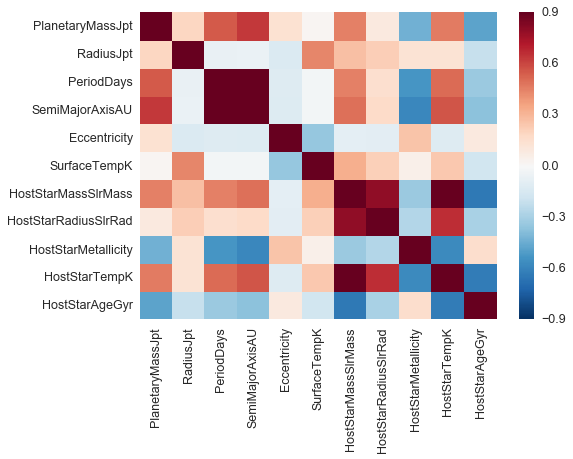

In [9]:
sns.set(rc={"figure.figsize": (15, 12)}) 
sns.set(font_scale=1.25)
sns.heatmap(corrmatrix,annot_kws={"size":29},fmt='d',vmax=0.9)
print("Here is a visualization (heat map or matrix) of the correlation matrix for these features:")

From the correlation matrix and corresponding heat matrix, we note the following **higher positive linear correlations** (~0.5 or higher) between pairs of features and whether they are expected or somewhat unexpected based on our prior knowledge of orbital mechanics, physics/astrophysics, planetary science, and the formation of solar systems:
* The planet's orbital period (**PeriodDays**) and its semi-major axis (**SemiMajorAxisAU**)  (expected)
* The host star's mass (**HostStarMassSlrMass**) and the host star's temperature (**HostStarTempK**) (expected)
* The host star's mass (**HostStarMassSlrMass**) and the host star's physical radius (**HostStarRadiusSlrRad**) (expected)
* The host star's temperature (**HostStarTempK**) and the host star's physical radius (**HostStarRadiusSlrRad**) (expected)
* The planetary mass (**PlanetaryMassJpt**) and the planetary semi-major axis (**SemiMajorAxisAU**) (expected)
* The planetary mass (**PlanetaryMassJpt**) and the planetary orbital period (**PeriodDays**) (expected)
* The planetary semi-major axis (**SemiMajorAxisAU**) and the host star temperature (**HostStarTempK**) (perhaps less expected or less obvious why this should be the case)
* The planetary orbital period (**PeriodDays**) and the host star temperature (**HostStarTempK**) (perhaps less expected or less obvious why this should be the case)

We also note the following **high negative linear correlations** (~-0.5 or lower) between pairs of features and whether they are expected or somewhat unexpected based on our prior knowledge of orbital mechanics, physics/astrophysics, planetary science, and the formation of solar systems:
* The host star's mass (**HostStarMassSlrMass**) and the host star's age (**HostStarAgeGyr**) (expected)
* The host star's metallicity (**HostStarMetallicity**) and the planet's semi-major axis (**SemiMajorAxisAU**) (perhaps less expected or less obvious why this should be the case)
* The host star's metallicity (**HostStarMetallicity**) and the planet's orbital periods (**PeriodDays**) (perhaps less expected or less obvious why this should be the case)
* The host star's metallicity (**HostStarMetallicity**) and the host star's temperature (**HostStarTempK**) (expected)
* The host star's temperature (**HostStarTempK**) and the host star's age (**HostStarAgeGyr**) (expected)

We can further examine the correlation of these features with histograms and scatter plots.

In [10]:
# First we examine the features with high positive linear correlations
selected_features1 = ['PeriodDays','SemiMajorAxisAU','HostStarMassSlrMass','HostStarTempK','HostStarRadiusSlrRad',
                     'PlanetaryMassJpt']
features1 = planetData[selected_features1].dropna()  # remove the NaN values
print("Number of observations: ", features1.shape[0])
features1.head()

Number of observations:  777


,PeriodDays,SemiMajorAxisAU,HostStarMassSlrMass,HostStarTempK,HostStarRadiusSlrRad,PlanetaryMassJpt
0,0.176891,0.0048,0.46,3584.0,0.45,0.0014
3,19.224180,0.1430,1.07,5777.0,1.02,0.2500
4,39.031060,0.2290,1.07,5777.0,1.02,0.1700
5,1.592851,0.0271,1.07,5777.0,1.02,0.0220
13,2.705782,0.0447,1.63,6490.0,2.18,1.2400


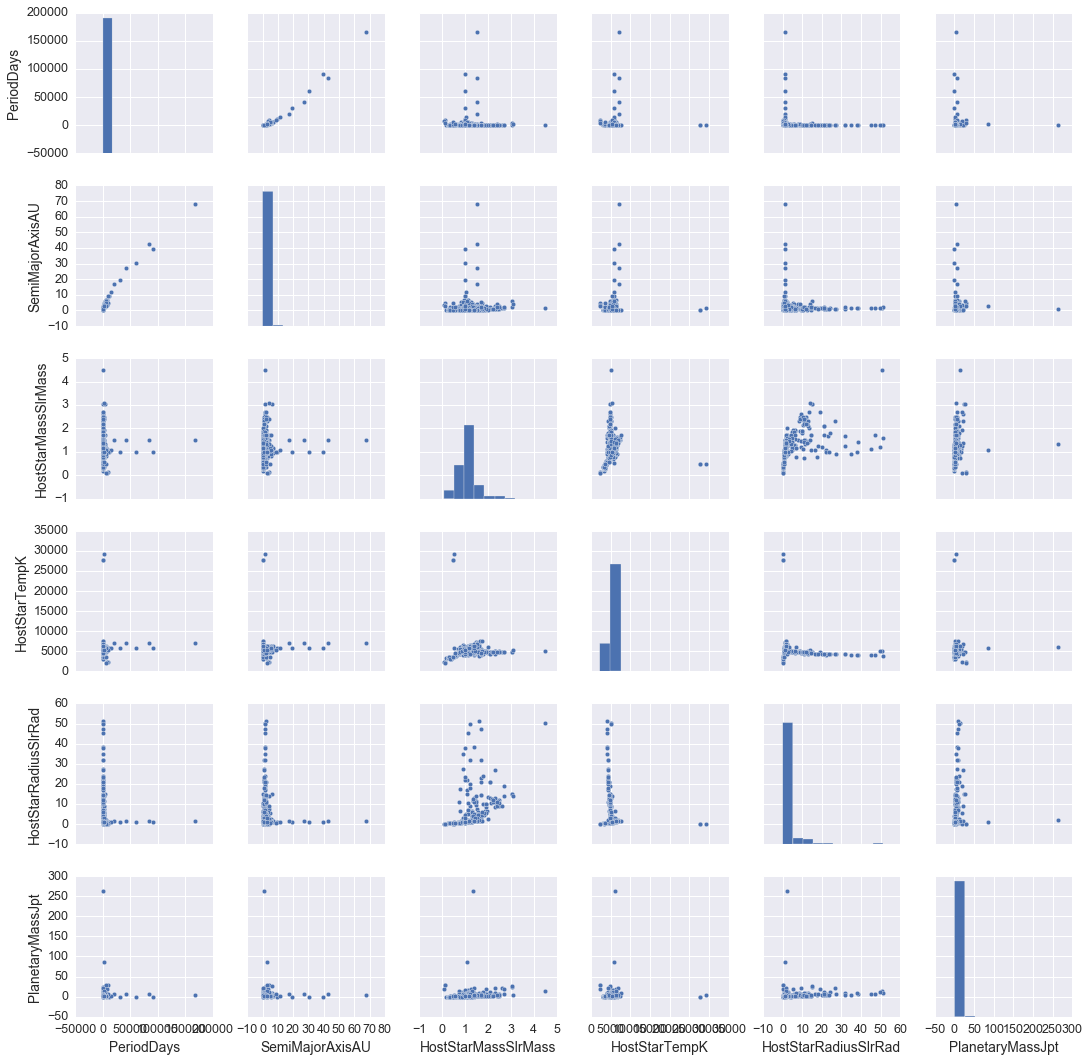

In [11]:
sns.pairplot(features1)

From the correlation matrix and the scatter plots above, we see that the two features with the largest positive correlation are the planetary orbital period and the semi-major axis of the orbit. We'll take a closer look at this: 

In [12]:
selectedFeatures1=['SemiMajorAxisAU','PeriodDays']  # we make a list of the columns we want to examine further
planets_selectedFeatures1=planetData[selectedFeatures1].dropna() # remove the NaN values
planets_selectedFeatures1.head()

,SemiMajorAxisAU,PeriodDays
0,0.0048,0.176891
1,0.0390,4.194525
2,0.0520,6.356006
3,0.1430,19.224180
4,0.2290,39.031060


In [13]:
# We add a new column 'PeriodYears' for the planetary orbital period (how long it takes for the planet to orbit 
# its host star in years) to make it easier to compare with the Earth.   
planets_selectedFeatures1['PeriodYears']=planets_selectedFeatures1['PeriodDays']/365.25
print("Number of observations: ", planets_selectedFeatures1.shape[0])

Number of observations:  1236


# Simple Linear Regression Analysis of Semi-major Axis and Period

We can see what a simple **linear regression** on these two features by themselves looks like by plotting a regression line:

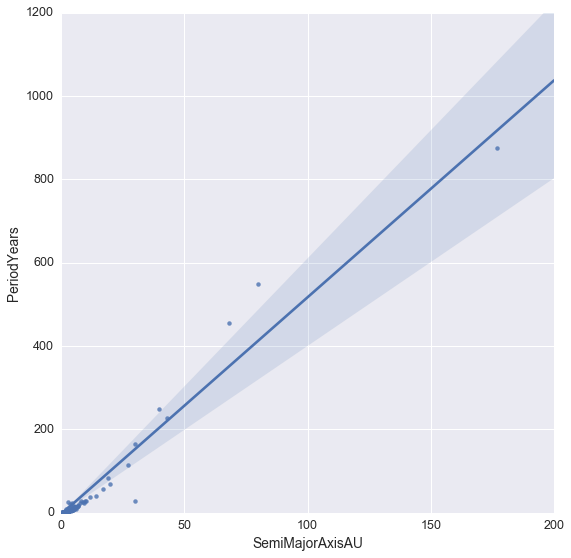

In [14]:
sns.pairplot(planets_selectedFeatures1, x_vars=['SemiMajorAxisAU'],y_vars='PeriodYears', size=8, 
             kind='reg')
sns.plt.xlim(0,200);
sns.plt.ylim(0,1200);

Let's blow up the portion of the plot where most of the observations lie (i.e., PeriodYears < 50 and SemiMajorAxisAU < 20):

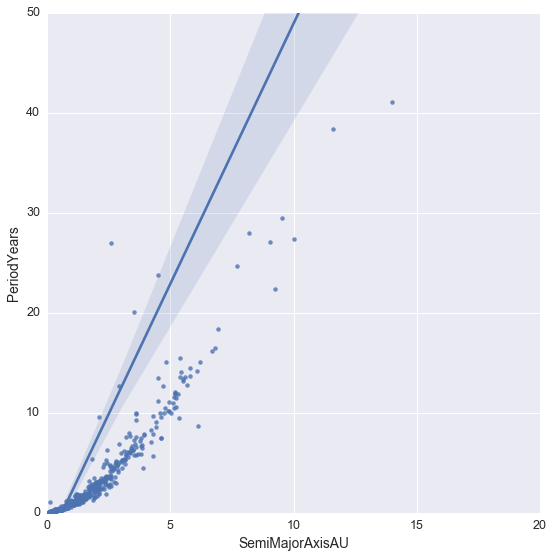

In [15]:
sns.pairplot(planets_selectedFeatures1, x_vars=['SemiMajorAxisAU'],y_vars='PeriodYears', size=8, 
             kind='reg')
sns.plt.xlim(0,20);
sns.plt.ylim(0,50);

We can also obtain the pearson-r coefficient from a Seaborn jointplot. This jointplot shows the same bivariate scatterplot along with univariate histograms in the same figure.

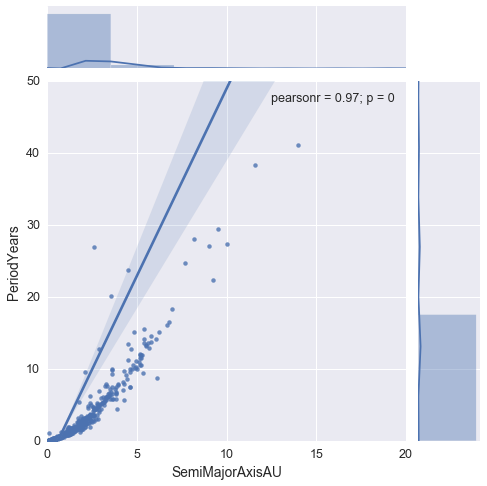

In [16]:
sns.jointplot('SemiMajorAxisAU', 'PeriodYears',data=planets_selectedFeatures1, kind="reg", size=7, xlim=(0,20),
              ylim=(0,50))


**The strong correlation between the planetary orbital period and the distance from the star is what we expect from Kepler's Third Law and Newton's Universal Law of Gravitation.** 

If P is the period of the planetary orbit, measured in years, and a is the semimajor axis of the orbit, measured in Astronomical Units, then Kepler's and Newton's laws give the following relation:

P = K*a^(3/2), where K is a constant and approximately equal to (4*pi^2/G*M)^(3/2), where M is the mass of the host star and G is the gravitational constant (https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion).


Thus, we can see that the true relationship between P and a is not in fact linear. Nevertheless, let's further explore this with a scikit-learn simple linear regression model with 1 feature.



total data size: (1236, 1)
size of y: (1236, 1)
The y intercept: [-3.10586915]
The single coefficient: [[ 5.20371411]]
Variance score:  0.947924928197
RMSE for simple linear regression model (1 feature):  7.81264676838

 This is a plot of y vs. y_pred


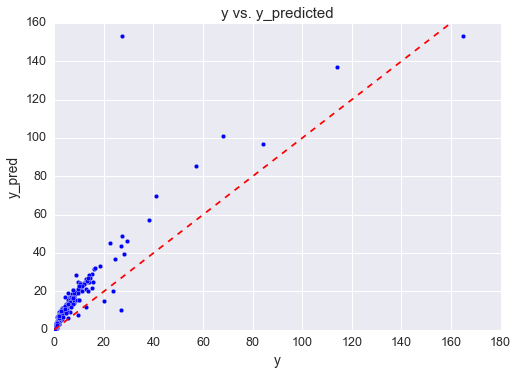

In [17]:
# Build a Model and create X and y:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

X = planets_selectedFeatures1.SemiMajorAxisAU.reshape(1236,1) # We create a matrix X here that holds our feature
y = planets_selectedFeatures1.PeriodYears.reshape(1236,1)   # We create a vector y that holds our response variable

# Split arrays or matrices into random train and test subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print("training data size:",X_train.shape)
# print("testing data size:",X_test.shape)
print ("total data size:", X.shape)
print("size of y:", y.shape)
# print("size of y_train: ", y_train.shape)
# print("size of y_test: ", y_test.shape)

# Instantiate and fit
linreg = LinearRegression()
# linreg.fit(X_train, y_train)
linreg.fit(X, y)

# print the coefficients
print("The y intercept:", linreg.intercept_)
print("The single coefficient:", linreg.coef_)

# Predict the model
# y_pred=linreg.predict(X_test)
# print(y_pred.shape)
y_pred=linreg.predict(X)

# Get a Score
# print(linreg.score(X_test,y_test))
print("Variance score: ", linreg.score(X,y))

print("RMSE for simple linear regression model (1 feature): ",np.sqrt(metrics.mean_squared_error(y, y_pred)))


# Plot y vs y_pred

print("\n This is a plot of y vs. y_pred")
plt.scatter(y, y_pred)
plt.plot([0,1000],[0,1000], 'r--')
plt.xlim(0,180);
plt.ylim(0,160);
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('y vs. y_predicted');


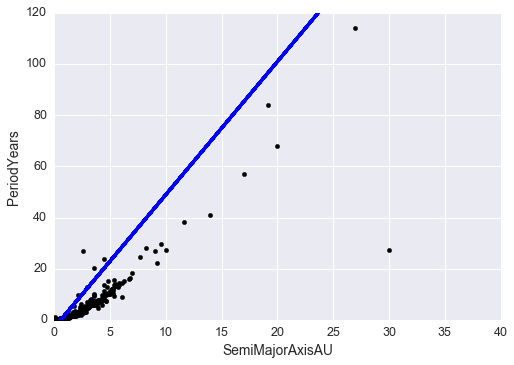

In [18]:
# More plot outputs
plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue',
         linewidth=3)

plt.xlim(0,40);
plt.ylim(0,120);
plt.xlabel('SemiMajorAxisAU')
plt.ylabel('PeriodYears')

**The straight line in the plot above shows how the linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.**

We also examine the **residuals**, i.e., the difference between the PeriodYears observations (y) and the predicted values of PeriodYears (y_pred):



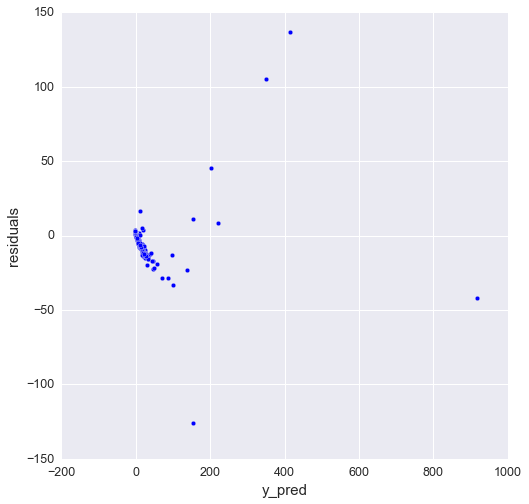

In [19]:
residuals = y - y_pred
plt.figure(figsize=(8, 8))
plt.scatter(y_pred,residuals)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('residuals', fontsize=15)

### Using the model for prediction
Now that we've got a fitted linear regression model we can try to make a prediction with the model. Let's say that there was a new observation of an exoplanet that had a SemiMajorAxisAU of 5.2. What would we predict the orbital period in years of that planet for this model to be?

$$y = \beta_0 + \beta_1 x$$
$$y = -3.105 + 5.203 \times 5.2$$

In [20]:
# Manually calculate it and confirm with the plots we created above. Does this value make sense?
-3.105 + 5.203 * 5.2   

23.9506

We can also use our linear regression model to make this same prediction:

In [21]:
# predict for a new observation, here the semi-major axis is 5.2 AU
print(linreg.predict(5.2))  

[[ 23.95344422]]


So, we would predict a Period of 23.95 years for a model with a semi-major axis of 5.2 AU.

We can also confirm the R-squared value for our simple linear model using scikit-learn's prebuilt R-squared scorer:

In [22]:
metrics.r2_score(y, y_pred)  

# This is a way to measure how good of a model this is. This is the Pearson R
# coefficient and it indicates how closely our best-fit line explains the variation
# of the data. An R-squared score closer to 1 is always better.

0.94792492819672725

# Multiple Linear Regression Analysis involving Semi-major Axis, Period, Planetary Mass, Planetary Radius, and Host Star Temperature

Of course, we know that the theoretical relationship (Kepler's and Newton's laws) between the planet's orbital period and semi-major axis also involves the mass of the host star as well, so a better linear regression model would need to include the star's mass as an additional feature as well. Also, from our knowledge of our own solar system and from our knowledge of planetary system formation theories, we note that larger and more massive gas giant planets often form and orbit their host stars at greater distances than the smaller terrestrial (Earth-like) planets. This suggests that it might be interesting to construct a more complex multiple linear regression model involving semi-major axis, planetary mass, planetary radius and host star temperature (given that there was a higher than expected correlation between host star temperature and orbital period) as features and the orbital period as the target variable.

First, we'll take a closer look at the relationship between the planetary mass and the distance of the planet from the host star.

In [24]:
selectedFeatures2=['SemiMajorAxisAU','PlanetaryMassJpt']  # we make a list of the columns we want to examine further
planets_selectedFeatures2=planetData[selectedFeatures2].dropna() # remove the NaN values
planets_selectedFeatures2.head()

,SemiMajorAxisAU,PlanetaryMassJpt
0,0.0048,0.0014
3,0.1430,0.2500
4,0.2290,0.1700
5,0.0271,0.0220
6,0.0530,0.0321


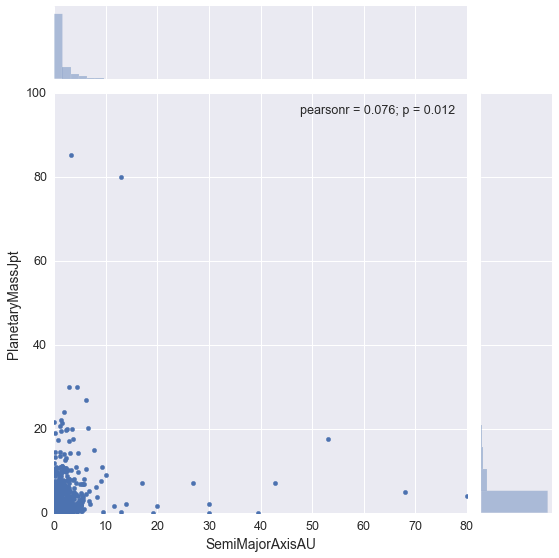

In [31]:
sns.jointplot(x="SemiMajorAxisAU", y="PlanetaryMassJpt",xlim =(0,80), ylim=(0,100), data=planets_selectedFeatures2,
              size=8)

# Additional Analysis and Visualizations of Interesting Features

We analyze some additional features in this dataset with strong linear correlations or anti-correlations. 